**Zomato** APIs give you access to the freshest and most exhaustive information for over 1.5 million restaurants across 10,000 cities globally.

By Collecting the data using Zomato API one can recommend restaurants on the basis of user’s affinity to specific cuisines, establishment types, locations, and price bands.
We can find out whether restaurant support online reservation or not.
We can find what is the most popular and/ or exclusive/new at a given location & time.

**Zomato API documentation** [link](https://developers.zomato.com/api)

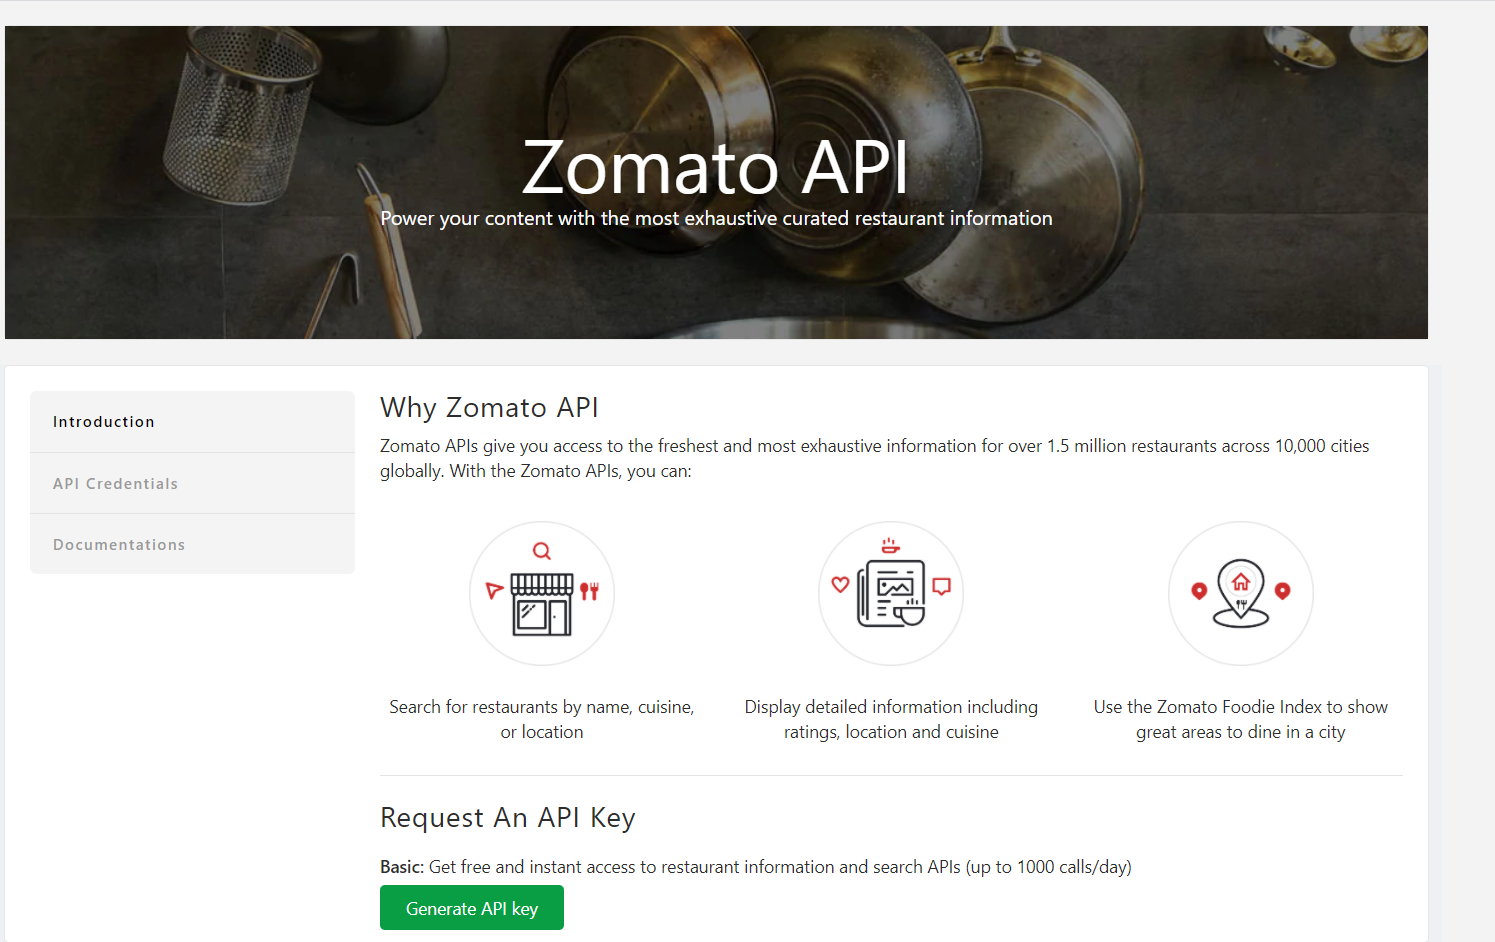

After Clicking on ***Generate API Key*** button you will get your API Key 

**Authentication :**

In [1]:
user_id = ''   # (Pass your user Id here ; Example --> 'swaraj123')
api_key = ''  # (pass api_key provided by Zomato API; Example --> 'ecf04hssvgdcgvscsgv01cbhshscbh')

***Zomato cuisine***

Mexican cuisine began about 9,000 years ago, when agricultural communities such as the Maya formed, domesticating maize, creating the standard process of corn nixtamalization, and establishing their foodways.
You are a huge fan of ‘Mexican’ cuisine. Now using the Zomato API you want to analyse the best restaurant serving the Mexican Cuisine, their locations, and cost for two, etc.

In [2]:
# Dependencies
import requests 
import json 

**1.Cuisine_Id of Mexican**

In [3]:
# Required params
data = {'city_id':1}

# headers
headers = {'User-Agent':user_id,'user_key':api_key}

# Get request
res = requests.get('https://developers.zomato.com/api/v2.1/cuisines',headers = headers,params = data)

# Converting it into python data 
data = res.json()
cuisines = data['cuisines']

# Checking for Mexican cuisine Id
for i in cuisines:
    if i['cuisine']['cuisine_name']=='Mexican':
        print('Cuisine_Id :',i['cuisine']['cuisine_id'])

Cuisine_Id : 73


**2.Entity-id and Entity-type of Connaught Place**

In [4]:
# Required Params
data = {'query':"Connaught Place"}

# Get request
res = requests.get('https://developers.zomato.com/api/v2.1/locations',headers = headers,params = data)
data = res.json()
for i in data["location_suggestions"]:
    print('Entity-type',i["entity_type"],'|','Entity-Id',i["entity_id"])

Entity-type subzone | Entity-Id 104


**3.Top 10 best-rated restaurant serving ‘Mexican’ cuisine present in Connaught Place**

In [5]:
# Required Params
data = {'entity_id' : 104, 'entity_type' : 'subzone', 'cuisines' : '73', 'sort' : 'rating', 'order' : 'desc'}

res = requests.get('https://developers.zomato.com/api/v2.1/search', params = data , headers = headers)

# Printing the top 10 Mexican cuisine restaurants on the basis of ratings
print('Restaurant Name |','Aggregate Rating |','Restaurant ID')
print('---------------------------------------------------')

for i in res.json()['restaurants'][:10]:
    print(i['restaurant']['name'], i['restaurant']['user_rating']['aggregate_rating'], i['restaurant']['id'])

Restaurant Name | Aggregate Rating | Restaurant ID
---------------------------------------------------
Farzi Cafe 4.5 18233593
Station Bar 4.5 18851371
Tamasha 4.4 18238278
Master Of Malts 4.4 18391149
Chili's Grill & Bar 4.4 18537536
Local 4.3 18382360
The Junkyard Cafe 4.3 313256
Xero Degrees 4.3 18729557
Ministry Of Beer 4.3 18418277
Teddy Boy 4.3 18281985


**4.Best-rated restaurant for ‘Mexican’ cuisine with category type ‘ Cafes’ present in Connaught Place**

In [6]:
res = requests.get('https://developers.zomato.com/api/v2.1/search', params = {'entity_id' : 104, 'entity_type' : 'subzone', 'cuisines' : '73',"category" : "6", 'sort' : 'rating', 'order' : 'desc'}, headers = headers)

print('Restaurant Name |','Aggregate Rating |','Restaurant ID')
print('---------------------------------------------------')
for i in res.json()['restaurants']:
    print(i['restaurant']['name'], i['restaurant']['user_rating']['aggregate_rating'], i['restaurant']['id'])

Restaurant Name | Aggregate Rating | Restaurant ID
---------------------------------------------------
Xero Degrees 4.3 18729557
Chaayos - Meri Wali Chai 4.1 18237315
The Art House Bar n Cafe 4.0 18863766
Cafe Coffee Day - The Square 3.6 303034


**5.Latest review of the best-rated restaurant for ‘Mexican’ cuisine with Category type ‘Cafes’ present in Connaught Place**

In [7]:
data = {'res_id' : 18729557}
# Get request
res = requests.get('https://developers.zomato.com/api/v2.1/reviews', params = data , headers = headers)

print('Username |','User Rating |','Review' )
print('---------------------------------------------------')

for i in res.json()['user_reviews']:
    print(i["review"]["user"]["name"],'|',i["review"]["rating"],'|',i["review"]["review_text"])
    print('---')


Username | User Rating | Review
---------------------------------------------------
Tanya Nagpal | 3 | Food here tastes really good, specially the peri peri chicken fries. I didn't liked the paneer burger much but everything else was delicious.
---
Prachi | 4 | Yesterday, I went to this place for the first time. My order: Veggie Affair: 3.5/5 The pizza tasted just fine. Portion size wasn't disappointing. I'd love to try other pizzas from Xero Degrees someday. Peri Peri Fries: 4/5 This was very much delicious. Something I'd love to order again.  Ambience: Space is a lil problem here. Otherwise everything else is good.  Overall: 4/5 Would recommend! ♥️
---
Diwanshi Agarwal | 5 | A cosy cafe with nice ambience. The food was awesome and affordable and service was satisfactory. Great place to hangout with your friends or go on a date!  Loved the overall experience!
---
Ayushi Singh | 4 | 
---
Delhifoodsandco | 5 | Loved the place so much. Freak shakes are superb. They are must try there. I 

**Zomato Restaurant**

**"Pa Pa Ya" restaurant :**

"***Pa Pa Ya***" is a modern Asian bistro & tapas bar from the House of Massive Restaurants and best described as a chic, modern and radical reinterpretation of Asian cuisine.

**1.User rating, Average cost for two, Cuisines and Address**

In [8]:
# Required Parameters
data = {'entity_id' : 1, 'entity_type' : 'city', 'cuisines' : '3', 'sort' : 'rating', 'order' : 'desc'}

# Get request
res = requests.get('https://developers.zomato.com/api/v2.1/search', params = data, headers = headers)
print('Pa Pa Ya restaurant :')
for i in res.json()['restaurants']:
    if i['restaurant']['name'] == "Pa Pa Ya":
        print('User Rating -->',i['restaurant']['user_rating']['aggregate_rating'])
        print('average cost of two -->',i['restaurant']['average_cost_for_two'])
        print('Cuisines -->',i['restaurant']['cuisines'])
        print('Address -->',i['restaurant']['location']['address'])

Pa Pa Ya restaurant :
User Rating --> 4.9
average cost of two --> 2500
Cuisines --> Asian, Chinese, Thai, Japanese
Address --> A-3, Select Citywalk, District Centre, Saket, New Delhi


**2.Table Availability at Pa Pa Ya**

In [9]:
# Required Parameters
data = {'entity_id' : 1, 'entity_type' : 'city', 'cuisines' : '3', 'sort' : 'rating', 'order' : 'desc'}

# Get request
res = requests.get('https://developers.zomato.com/api/v2.1/search', params = data, headers = headers)

for i in res.json()['restaurants']:
    if i['restaurant']['name'] == "Pa Pa Ya":
        
        if i['restaurant']['is_table_reservation_supported'] == 1 :
            print("Table is available at Pa Pa Ya")
        else:
            print("Table is not available at Pa Pa Ya")

Table is available at Pa Pa Ya


**3.*Pa Pa Ya* Review**

In [10]:
# Required Paramteres
data = {'res_id' : 18429148}

# Get request
res = requests.get('https://developers.zomato.com/api/v2.1/reviews', params = data, headers = headers)

print('Username |','User Rating |','Review' )
print('---------------------------------------------------')

for i in res.json()['user_reviews']:
    print(i["review"]["user"]["name"],'|',i["review"]["rating"],'|',i["review"]["review_text"])
    print('---')

Username | User Rating | Review
---------------------------------------------------
Yuvraj Singh Narang | 5 | I went for a lunch with my parents in the covid times and i was mightily impressed by this restaurant. It was a near perfect experience. Everything is so classy about this restaurant and management. Had an amazing time. Great food, awesome cocktails. The cuisines served are amazing value for money. Would strongly recommend, atleast for people who are non-vegetarians as i didn't have anything vegetarian on their menu.
---
Himamarian | 4 | Jad kunch with my family and had a great experience. Tasty food and excellent service. The covid precautions were all in place.  Will visit again.
---
Aniruddh Awasthi | 5 | 
---
Varun Apan | 5 | Awesome Food Corteous Staff  Cocktails were good The Dessert was awesome  Love every time I go there...
---
Shantanu Kumar | 5 | Having been to the restaurant over thrice this month, I’m in absolute fan of the service and food at offer. Vikram has been

**3.Top 10 best-restaurant present in a radius of 4 km of coding ninjas**

In [11]:
# Required Parameters
data = {'lat' : '28.697522', 'lon': '77.140681','radius' : '400', 'sort' : 'rating', 'order' : 'desc'}

# Get request
res = requests.get('https://developers.zomato.com/api/v2.1/search', params = data, headers = headers)

print('Username |','User Rating |','Review' )
print('---------------------------------------------------')

for i in res.json()['restaurants'][:10]:    
    print(i['restaurant']['name'],'|',i['restaurant']['user_rating']['aggregate_rating'],'|',i['restaurant']['R']['res_id'],i['restaurant']['location']['locality'])
    print('---')    


Username | User Rating | Review
---------------------------------------------------
Indian Accent | 4.9 | 2004 The Lodhi, Lodhi Road
---
Cafe Lota | 4.9 | 305525 Pragati Maidan
---
Pa Pa Ya | 4.9 | 18429148 Select Citywalk Mall, Saket
---
The Big Chill | 4.9 | 1614 Khan Market
---
Kuremal Mohan Lal Kulfi Wale | 4.9 | 303642 Chawri Bazar
---
Dum-Pukht - ITC Maurya | 4.9 | 2744 ITC Maurya, Chanakyapuri
---
The Big Chill | 4.9 | 8244 Khan Market
---
Chakkhna Snacks Parlour | 4.9 | 19123389 Geeta Colony
---
Manhattan Bar & Brewery | 4.8 | 303960 Global Foyer Mall, Golf Course Road
---
Cocktails & Dreams, Speakeasy | 4.8 | 300716 Sector 15
---
